# **Linear Regression** 

In [95]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
random.seed(10)

In [96]:
class myLinReg():
    def __init__(self, m, num_features):
        self.m = m
        self.num_features = num_features
        self.w = np.zeros((num_features+1, 1))
        #print("Shape of w : {}".format(self.w.shape))
        
    def train(self, X, y):
        X_bias = np.ones(shape=(np.size(X,0),1))
        Z = np.concatenate((X_bias, X),axis = 1)
       
        zt=Z.transpose()
        ztz = np.dot(zt,Z)
        I=np.identity(2)
        self.w=np.dot(np.dot(np.linalg.inv(ztz+self.m*I),zt),y)
        
    def predict(self, X):
        y_pred = np.zeros(shape=(np.size(X,0),1))
        X_bias = np.ones(shape=(np.size(X,0),1))
        Z = np.concatenate((X_bias, X),axis = 1)
        y_pred = np.dot(Z,self.w)
        return y_pred
    
    def compute_rmse(self, X, y):
        y_pred = self.predict(X)
        rmse = 0
        rmse = np.sqrt(((y-y_pred) ** 2).mean())
        return rmse

In [97]:
def linRegWithSingleFeature(X, y, m):
    num_features = 1
    #print("Number of features : {}".format(num_features))
    
    model = myLinReg(m, num_features)
    
    #Train model
    model.train(X, y)
    
    rmse = model.compute_rmse(X, y)
    print("RMSE with lambda={} is {}".format(m, rmse))
    
    #Visualization of prediction
    y_pred = model.predict(X)
    plotPrediction(X, y, y_pred, m)
    
    return rmse

#Return the best hyper-parameter for the single featured model
def findBestLambdaWithSingleFeature(X, y):
    m_list = [0.001, 0.01, 0.1, 1, 10, 50, 100]
    m_best = 1
    
    rmse_list = []
    for m in m_list:
        rmse = linRegWithSingleFeature(X, y, m)
        rmse_list.append(rmse)   
        
    #Plot m_list vs rmse_list to visualize the change n rmse with lambda(m)
    plt.scatter(x = m_list , y = rmse_list)
    plt.xlabel("m_list")
    plt.ylabel("rmse_list")
    plt.show()

    #Save the plot in the working directory (path)
    #Return the best hyper-parameter m
    m_rmse = min(rmse_list)
    m_best = m_list[rmse_list.index(m_rmse)]
    
    return m_best

def plotPrediction(X, y, y_pred, m):
    filename = "result_with_lambda_{}.jpg".format(m)
    fig = plt.figure()
    
    #Plot both y and y_pred
    #plt.plot(y,y_pred)
    plt.scatter(x = y , y = y_pred)
    plt.xlabel("y")
    plt.ylabel("y_pred")
    plt.show()
    
    fig.savefig(filename)

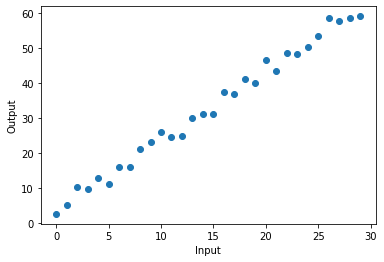

In [98]:
X = np.array(list(range(30)))
X = np.reshape(X, (np.size(X,0), 1))
y = np.array([(2*x+4 + random.choice([-3, 3])*random.uniform(0, 1)) for x in X])
plt.scatter(X, y, marker='o')
plt.ylabel('Output')
plt.xlabel('Input')
plt.show()

RMSE with lambda=1 is 1.7128510240237629


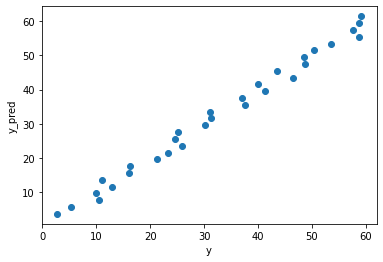

1.7128510240237629

In [99]:
#Run linear regression with single feature and default lambda = 1
m = 1
linRegWithSingleFeature(X, y, m)

RMSE with lambda=0.001 is 1.6981200340861784


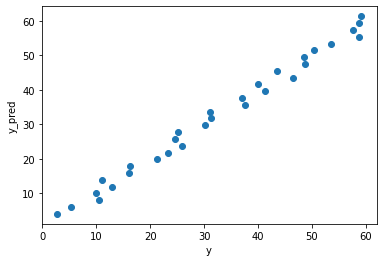

RMSE with lambda=0.01 is 1.6981218902188169


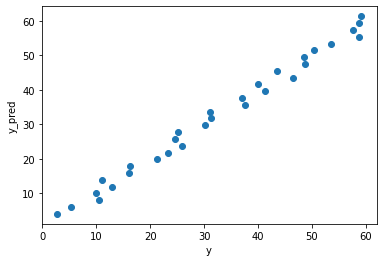

RMSE with lambda=0.1 is 1.6983032839285486


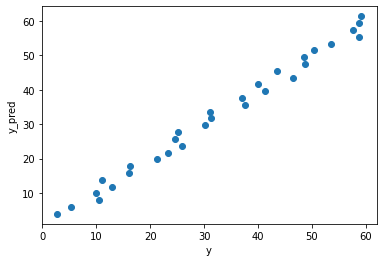

RMSE with lambda=1 is 1.7128510240237629


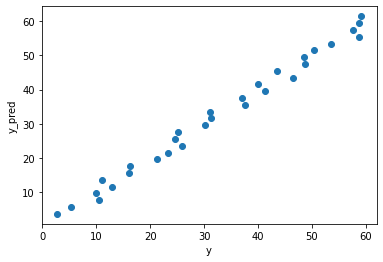

RMSE with lambda=10 is 2.030196352259707


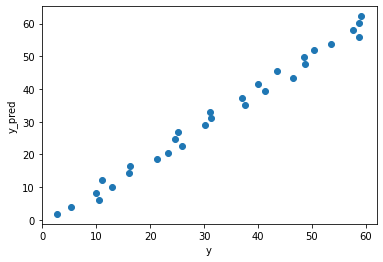

RMSE with lambda=50 is 2.4236554564677273


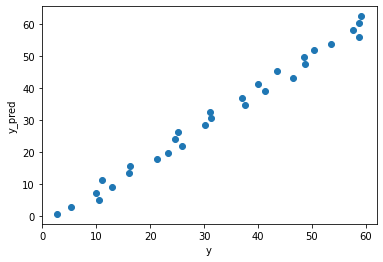

RMSE with lambda=100 is 2.540353021221373


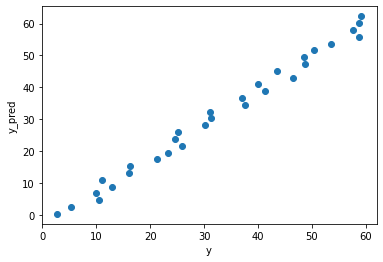

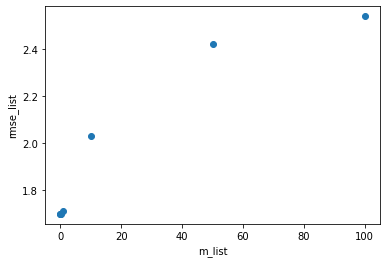



BEST m is: 0.001


In [101]:
#Find the best lambda for single featured model
m_best = findBestLambdaWithSingleFeature(X, y)
print(f"\n\nBEST m is: {m_best}")